In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical

2024-01-13 10:06:00.384087: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-13 10:06:00.556907: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-13 10:06:00.556958: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-13 10:06:00.640755: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-13 10:06:00.734370: I tensorflow/core/platform/cpu_feature_guar

In [47]:
# Replace 'file_path.csv' with the path to your CSV file
file_path = '/mnt/raid1/thalassini/home/filtered_fimo/CTCF/datasets/data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [48]:
df

,data,class
0,CAAAAACACTGACAGGAAAAGGGATGGACATGATTCCCAGAATCCT...,0
1,CTAACCTGACATGAATTAGGGCAGGTTTTTGAATTCGTGTTGAAAA...,0
2,TCCTCTGTAGCACAGGTTAACACTTCTGCTAGTTCCAGGACTGAGG...,0
3,GAACACATTAAACAGCAGGTTGCTTATTCCTTCTCAAACCGCACTA...,0
4,ATTTCTCGGAACAGGCAGAAAGGAAGCGGCAGGGAGGTGGGTACTC...,0
...,...,...
96489,CCACCCTCCACTCCTCACCCCTCATCCCTCACCACCTGCCTTTCAA...,1
96490,GGCGGTGACGCACGGCGCGGTGACGCAGCGCGACGGCGGCGGCGGC...,1
96491,GGCGGTGACGCACGGCGCGGTGACGCAGCGCGACGGCGGCGGCGGC...,1
96492,CTCCCTCTCTGATGCCTGGTCACACCAGGATGGCGGTACCATGTGC...,1


In [49]:
# Function to perform one-hot encoding for DNA sequences
def one_hot_encode(sequence):
    encoding = {'A': [1, 0, 0, 0], 'T': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'C': [0, 0, 0, 1]}
    one_hot_sequence = [encoding.get(base, [0, 0, 0, 0]) for base in sequence]
    return np.array(one_hot_sequence)

# Padding

In [50]:
lengths= [len(item) for item in df['data']] 
print(f'Max length:{max(lengths)}, Min length: {min(lengths)}')

Max length:218, Min length: 200


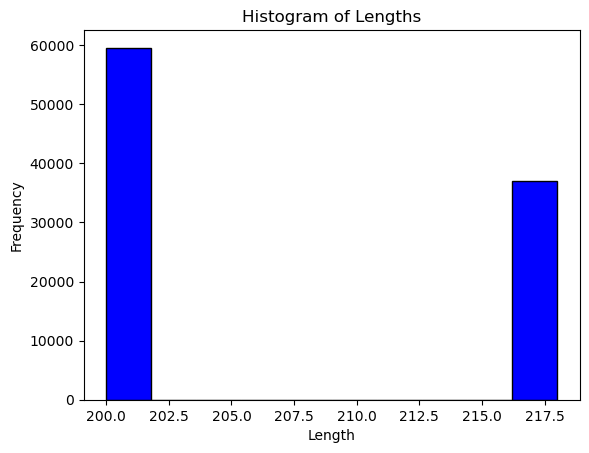

In [51]:
import matplotlib.pyplot as plt
# Plotting the histogram
plt.hist(lengths, bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [52]:
# Find the maximum length of sequences
#min_length = min(len(seq) for seq in df['data'])
limit=200


# Pad or cut sequences to ensure they all have the same length
cut_sequences = [seq[:limit] for seq in df['data']]

# Update the DataFrame with the cut sequences
df['data'] = cut_sequences

In [53]:
lengths= [len(item) for item in df['data']]
print(f'Max length:{max(lengths)}, Min length: {min(lengths)}')

Max length:200, Min length: 200


In [54]:
cut_sequences[:5]

['CAAAAACACTGACAGGAAAAGGGATGGACATGATTCCCAGAATCCTTCAGGCTAGCTCCTCCGCGCATCCACGTTCAACCGAGGCTGGTGATGTTGGAGCGGCCACCAGGGGGCGCCACGATGCGGTGGCCGGTGCGCCTGGGATTGTTGTCATCTATCTGGGCACCTGAAAGAGAGCGCCAATCGCTGCTGGATGGGAT',
 'CTAACCTGACATGAATTAGGGCAGGTTTTTGAATTCGTGTTGAAAAGAGCTTCCAACTGTGGCTCCGGAGTGGCCAGTTTCAAGCCATTCCTGTGTGACTGGCGCCCCCTGGTGGCCGAAAACCCAGGGACAGGCAAATGTATCGACTGAAGATTCCTGCTTGTTATATGGTGGTAGGGGAAATATTTTAAAGATCTTTT',
 'TCCTCTGTAGCACAGGTTAACACTTCTGCTAGTTCCAGGACTGAGGCCATCCAGATAGCGGCCAGCTGGGCCCAGCCACGTGCAAAATTGGAGGTCATTTGGCGCCCCCTGCTGGCCAATGAGGTTTCTGCATGTCACCGGCTTTTCAATTTCTCATTTCCCTGGAGGAAGCCCATAAAGTGAGAAAGAGCTAATAAAAG',
 'GAACACATTAAACAGCAGGTTGCTTATTCCTTCTCAAACCGCACTAAAAAATTCCTCTCTCGCATGTGTAGGTCCCAGAGCCAGACAGTTATGAGATGATGGTGCCCCCTGGTGGCCAATGTGGGGAGCCACCCGGCCAGGCGTGCTTCCTGGCTTTGTGCCAGCCATGCCTTTATTCTTTGGTTGGTTGGTTGGTTGGT',
 'ATTTCTCGGAACAGGCAGAAAGGAAGCGGCAGGGAGGTGGGTACTCCGGAGAGCGAGCTGAGCGCTCTGCTGCCCGGCGCCTGCCAGGCTGGGGAGCCATGGCGCCACCTGGTGGCCAGTCTTAGCAGCGGCGGGCGACAGTGGGTGAACGCAGGGGAGACCCGCGCAGGCTGCTTTT

In [55]:
X=[one_hot_encode(sequence) for sequence in cut_sequences]

In [56]:
X=np.array(X)
X.shape

(96494, 200, 4)

In [57]:
y=np.array(df['class'])
y[:3]

array([0, 0, 0])

In [58]:
len(y),len(X)

(96494, 96494)

import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

# Split train and test with stratification 

In [59]:
from sklearn.model_selection import train_test_split




# Perform a stratified split of the train
X_train, X_val, y_train, y_val = train_test_split(X, 
                                                y, 
                                                test_size=0.2,  # 20% test, 80% train
                                                random_state=42,  # Set seed for reproducibility
                                                stratify=y)  # Perform stratified split based on y

# Check the lengths of the train and test sets
len(X_train), len(X_val), len(y_train), len(y_val)



(77195, 19299, 77195, 19299)

In [63]:
# Count occurrences of each unique value in y_train using np.bincount
counts = np.bincount(y_train)
weights=len(y_train)/counts

# Display the counts
print(f"Counts of 0s and 1s in y_train: {counts}, the ratio is {counts[0]/counts[1]}")
print(f'The weights of the dataset are: {weights}')

Counts of 0s and 1s in y_train: [29544 47651], the ratio is 0.6200079746490105
The weights of the dataset are: [2.61288248 1.62000797]


In [64]:
# Count occurrences of each unique value in y_test using np.bincount
counts = np.bincount(y_val)

# Display the counts
print(f"Counts of 0s and 1s in y_train: {counts}, the ratio is {counts[0]/counts[1]}")


Counts of 0s and 1s in y_train: [ 7386 11913], the ratio is 0.6199949634852682


In [65]:
y_val.shape

(19299,)

In [77]:
# Define a custom callback to calculate balanced accuracy and loss
from tensorflow.keras.callbacks import Callback
class BalancedAccuracyLossCallback(Callback):
    def __init__(self, validation_data):
        self.validation_data = validation_data
        self.balanced_accuracies = []
        self.losses = []

    def on_epoch_end(self, epoch, weights=weights):
        x_val, y_val = self.validation_data
        y_pred = self.model.predict(x_val)
        y_pred_binary = np.round(y_pred)
        balanced_acc = balanced_accuracy_score(y_val, y_pred_binary)
        print(np.squeeze(y_val).shape)
        print(np.squeeze(y_pred).shape)
        loss = log_loss(y_val, np.squeeze(y_pred), #sample_weight=weights
                       )
            
        self.balanced_accuracies.append(balanced_acc)
        self.losses.append(loss)

        print(f'Epoch {epoch + 1}/{self.params["epochs"]} - '
              f'Balanced Accuracy: {balanced_acc:.4f} - Loss: {loss:.4f}')


In [78]:
# Function to train the model with the custom callback and plot the results
def train_and_plot(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=32):
    # Create an instance of the custom callback
    balanced_accuracy_loss_callback = BalancedAccuracyLossCallback(validation_data=(X_val, y_val))

    # Train the model with the custom callback
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val, y_val), callbacks=[balanced_accuracy_loss_callback])

    # Plotting the results
    epochs = range(1, epochs + 1)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, balanced_accuracy_loss_callback.balanced_accuracies, label='Balanced Accuracy')
    plt.title('Balanced Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Balanced Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, balanced_accuracy_loss_callback.losses, label='Loss', color='orange')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()




# Construct a 1layer CNN model using Keras

In [85]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Flatten, Conv1D, Dropout
from tensorflow.keras.optimizers import Adam  
from tensorflow.keras.models import Sequential
from sklearn.metrics import log_loss

In [79]:
# Define the model
model = Sequential()

# Add an LSTM layer with input shape (200, 4)
model.add(LSTM(1, input_shape=(200, 4)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.0001) 
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1)                 24        
                                                                 
 flatten_1 (Flatten)         (None, 1)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 26 (104.00 Byte)
Trainable params: 26 (104.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
 X_train.shape, y_train.shape, X_val.shape, y_val.shape

((77195, 200, 4), (77195,), (19299, 200, 4), (19299,))

In [76]:
train_and_plot(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=32)

NameError: name 'BalancedAccuracyLossCallback' is not defined

# Simple conv

In [80]:
# Create a Sequential model
model = Sequential()

# Add a Conv1D layer with 2 filters and kernel size 15
model.add(Conv1D(2, kernel_size=15, activation='relu', input_shape=(200, 4)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 186, 2)            122       
                                                                 
 flatten_2 (Flatten)         (None, 372)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               47744     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 47995 (187.48 KB)
Trainable params: 47995 (187.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_and_plot(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=32)

# 2 Layer CNN

In [63]:
model = Sequential()

# Add a Conv1D layer with 2 filters and kernel size 15
model.add(Conv1D(2, kernel_size=15, activation='relu', input_shape=(200, 4)))
model.add(Conv1D(2, kernel_size=5, activation='relu'))
model.add(Conv1D(2, kernel_size=5, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 186, 2)            122       
                                                                 
 conv1d_6 (Conv1D)           (None, 182, 2)            22        
                                                                 
 flatten_12 (Flatten)        (None, 364)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               46720     
                                                                 
 dense_18 (Dense)            (None, 1)                 129       
                                                                 
Total params: 46993 (183.57 KB)
Trainable params: 46993 (183.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
604/604 [==============================] - 2s 3ms/step
Epoch 1/100 - Balanced Accuracy: 0.5792 - Loss: 0.6117
2413/2413 [==============================] - 16s 6ms/step - loss: 0.6213 - accuracy: 0.6347 - val_loss: 0.6117 - val_accuracy: 0.6428
Epoch 2/100
604/604 [==============================] - 2s 3ms/step
Epoch 2/100 - Balanced Accuracy: 0.5954 - Loss: 0.6100
2413/2413 [==============================] - 15s 6ms/step - loss: 0.6121 - accuracy: 0.6450 - val_loss: 0.6100 - val_accuracy: 0.6439
Epoch 3/100
604/604 [==============================] - 2s 3ms/step
Epoch 3/100 - Balanced Accuracy: 0.5881 - Loss: 0.6094
2413/2413 [==============================] - 15s 6ms/step - loss: 0.6097 - accuracy: 0.6477 - val_loss: 0.6094 - val_accuracy: 0.6434
Epoch 4/100
604/604 [==============================] - 2s 3ms/step
Epoch 4/100 - Balanced Accuracy: 0.5834 - Loss: 0.6095
2413/2413 [==============================] - 15s 6ms/step - loss: 0.6078 - accuracy: 0.6507 - val_loss: 0.6095

Epoch 33/100
604/604 [==============================] - 2s 2ms/step
Epoch 33/100 - Balanced Accuracy: 0.6333 - Loss: 0.6889
2413/2413 [==============================] - 15s 6ms/step - loss: 0.4089 - accuracy: 0.8157 - val_loss: 0.6889 - val_accuracy: 0.6591
Epoch 34/100
604/604 [==============================] - 2s 3ms/step
Epoch 34/100 - Balanced Accuracy: 0.6375 - Loss: 0.6976
2413/2413 [==============================] - 15s 6ms/step - loss: 0.4015 - accuracy: 0.8199 - val_loss: 0.6976 - val_accuracy: 0.6577
Epoch 35/100
604/604 [==============================] - 2s 3ms/step
Epoch 35/100 - Balanced Accuracy: 0.6230 - Loss: 0.7146
2413/2413 [==============================] - 15s 6ms/step - loss: 0.3952 - accuracy: 0.8227 - val_loss: 0.7146 - val_accuracy: 0.6708
Epoch 36/100
604/604 [==============================] - 2s 2ms/step
Epoch 36/100 - Balanced Accuracy: 0.6307 - Loss: 0.7127
2413/2413 [==============================] - 15s 6ms/step - loss: 0.3890 - accuracy: 0.8281 - val_loss

Epoch 65/100
604/604 [==============================] - 2s 3ms/step
Epoch 65/100 - Balanced Accuracy: 0.6659 - Loss: 0.9486
2413/2413 [==============================] - 15s 6ms/step - loss: 0.2300 - accuracy: 0.9122 - val_loss: 0.9486 - val_accuracy: 0.6965
Epoch 66/100
604/604 [==============================] - 2s 3ms/step
Epoch 66/100 - Balanced Accuracy: 0.6648 - Loss: 0.9615
2413/2413 [==============================] - 15s 6ms/step - loss: 0.2258 - accuracy: 0.9142 - val_loss: 0.9615 - val_accuracy: 0.6997
Epoch 67/100
604/604 [==============================] - 2s 2ms/step
Epoch 67/100 - Balanced Accuracy: 0.6653 - Loss: 0.9761
2413/2413 [==============================] - 15s 6ms/step - loss: 0.2218 - accuracy: 0.9161 - val_loss: 0.9761 - val_accuracy: 0.7010
Epoch 68/100
604/604 [==============================] - 2s 3ms/step
Epoch 68/100 - Balanced Accuracy: 0.6647 - Loss: 0.9784
2413/2413 [==============================] - 15s 6ms/step - loss: 0.2170 - accuracy: 0.9178 - val_loss

Epoch 97/100
604/604 [==============================] - 2s 3ms/step
Epoch 97/100 - Balanced Accuracy: 0.6836 - Loss: 1.3890
2413/2413 [==============================] - 15s 6ms/step - loss: 0.1124 - accuracy: 0.9631 - val_loss: 1.3890 - val_accuracy: 0.7043
Epoch 98/100
604/604 [==============================] - 2s 3ms/step
Epoch 98/100 - Balanced Accuracy: 0.6802 - Loss: 1.5191
2413/2413 [==============================] - 15s 6ms/step - loss: 0.1089 - accuracy: 0.9640 - val_loss: 1.5191 - val_accuracy: 0.7258
Epoch 99/100
604/604 [==============================] - 2s 3ms/step
Epoch 99/100 - Balanced Accuracy: 0.6909 - Loss: 1.4597
2413/2413 [==============================] - 15s 6ms/step - loss: 0.1067 - accuracy: 0.9662 - val_loss: 1.4597 - val_accuracy: 0.7263
Epoch 100/100
604/604 [==============================] - 2s 3ms/step
Epoch 100/100 - Balanced Accuracy: 0.6916 - Loss: 1.4598
2413/2413 [==============================] - 15s 6ms/step - loss: 0.1039 - accuracy: 0.9672 - val_lo

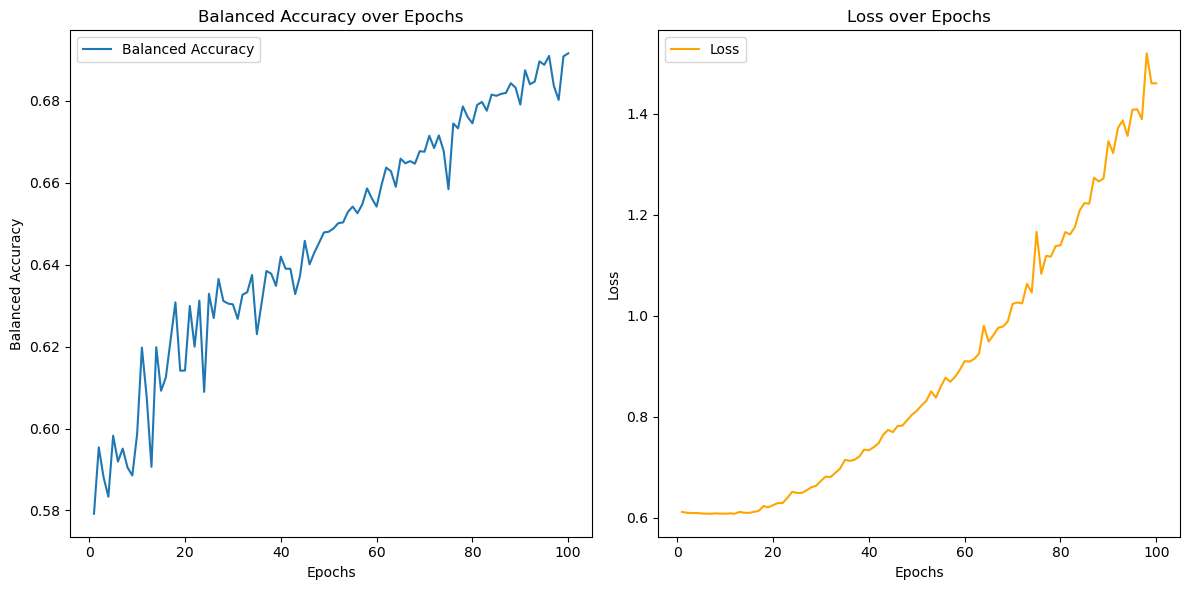

In [64]:
train_and_plot(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=32)

In [ ]:
train_and_plot(model, X_train, y_train, X_val, y_val, epochs=10, batch_size=32)


# Optimise 3 layer CNN with optuna

In [82]:
pip install optuna

  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/4c/6a/219a431aaf81b3eb3070fd2d58116baa366d3072f43bbcc87dc3495b7546/optuna-3.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/7f/50/9fb3a5c80df6eb6516693270621676980acd6d5a9a7efdbfa273f8d616c7/alembic-1.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/95/df/520663eb7f7a329f7c585834b754bcc3cbcc03957d85fcbba4a2a723ad9d/colorlog-6.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for Mako from https://files.pythonhosted.org/packages/24/3b/11fe92d68c6a42468ddab0cf03f454419b0788fff4e91ba46b8bebafeffd/Mako-1.3.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 4.8 MB/s eta 0:00:004.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

In [86]:
import optuna
from sklearn.metrics import matthews_corrcoef




def objective(trial):
    # Define hyperparameters to be optimized
    lstm_units = trial.suggest_int('lstm_units', 32, 256, log=True)
    conv1_filters = trial.suggest_int('conv1_filters', 8, 64, log=True)
    conv1_kernel_size = trial.suggest_int('conv1_kernel_size', 3, 15)
    conv2_filters = trial.suggest_int('conv2_filters', 8, 64, log=True)
    conv2_kernel_size = trial.suggest_int('conv2_kernel_size', 3, 15)
    conv3_filters = trial.suggest_int('conv3_filters', 8, 64, log=True)
    conv3_kernel_size = trial.suggest_int('conv3_kernel_size', 3, 15)
    dense_units = trial.suggest_int('dense_units', 32, 256, log=True)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)

    # Build the model
    model = Sequential()
    model.add(Conv1D(filters=conv1_filters, kernel_size=conv1_kernel_size, activation='relu', input_shape=(200, 4)))
    model.add(Conv1D(filters=conv2_filters, kernel_size=conv2_kernel_size, activation='relu'))
    model.add(Conv1D(filters=conv3_filters, kernel_size=conv3_kernel_size, activation='relu'))
    model.add(Flatten())
    model.add(Dense(units=dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # Evaluate the model on validation data using MCC
    y_pred = model.predict(X_val)
    mcc = matthews_corrcoef(y_val, (y_pred > 0.5).astype(int))

    return mcc




In [87]:
# Create Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params
print(f"Best Hyperparameters: {best_params}")

# Build the final model with the best hyperparameters
best_model = Sequential()
best_model.add(Conv1D(filters=best_params['conv1_filters'], kernel_size=best_params['conv1_kernel_size'], activation='relu', input_shape=(200, 4)))
best_model.add(Conv1D(filters=best_params['conv2_filters'], kernel_size=best_params['conv2_kernel_size'], activation='relu'))
best_model.add(Conv1D(filters=best_params['conv3_filters'], kernel_size=best_params['conv3_kernel_size'], activation='relu'))
best_model.add(Flatten())
best_model.add(Dense(units=best_params['dense_units'], activation='relu'))
best_model.add(Dropout(best_params['dropout_rate']))
best_model.add(Dense(1, activation='sigmoid'))

best_model.summary()



[I 2024-01-13 10:35:48,669] A new study created in memory with name: no-name-35354ba2-0b1f-47d7-82be-0e429c65f42f
[W 2024-01-13 10:38:40,490] Trial 0 failed with parameters: {'lstm_units': 150, 'conv1_filters': 9, 'conv1_kernel_size': 5, 'conv2_filters': 18, 'conv2_kernel_size': 7, 'conv3_filters': 39, 'conv3_kernel_size': 12, 'dense_units': 63, 'dropout_rate': 0.13128650951952986, 'learning_rate': 0.0452551805555059} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/mnt/raid1/thalassini/home/anaconda3/lib/python3.11/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/tmp/ipykernel_1928099/2050369522.py", line 35, in objective
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)
  File "/mnt/raid1/thalassini/home/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in err

KeyboardInterrupt: 

In [ ]:
# Compile the final model
best_optimizer = Adam(learning_rate=best_params['learning_rate'])
best_model.compile(optimizer=best_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the final model on the entire dataset
best_model.fit(X, y, epochs=10, batch_size=32)